In [1]:
# Importing Required Packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import random
import names
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Creating Lists for Dataframe
height = sorted([random.randint(100, 210) for i in range(10)])
weight = sorted([random.randint(35, 100) for i in range(10)])
print(height)
print(weight)

[113, 114, 135, 142, 154, 191, 193, 193, 194, 194]
[49, 50, 52, 58, 64, 68, 91, 91, 92, 94]


In [3]:
# Creating DF
df = pd.DataFrame({"Height" : height, "Weight": weight})
df

,Height,Weight
0,113,49
1,114,50
2,135,52
3,142,58
4,154,64
5,191,68
6,193,91
7,193,91
8,194,92
9,194,94


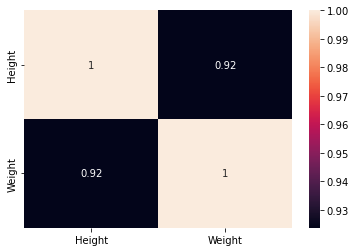

In [4]:
# Checking the Correlation
sns.heatmap(df.corr(), annot = True);

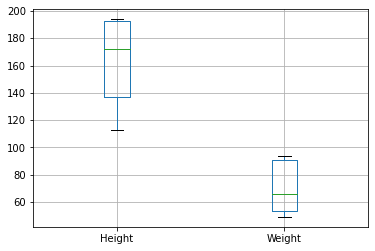

In [5]:
# Outliers
df.boxplot();

In [6]:
# Nulls
df.isnull().sum()

Height    0
Weight    0
dtype: int64

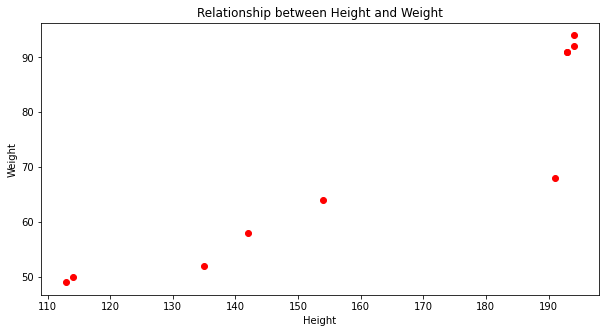

In [7]:
plt.figure(figsize = (10, 5))
plt.title("Relationship between Height and Weight")
plt.scatter(df['Height'], df['Weight'], color = 'r')
plt.xlabel('Height')
plt.ylabel('Weight');

In [8]:
# Choose Indenpendent and Target Variables
x = df[['Height']]
y = df['Weight']
x.head(2)

,Height
0,113
1,114


In [9]:
y.head(2)

0    49
1    50
Name: Weight, dtype: int64

# Build the Model

In [10]:
model = LinearRegression().fit(x, y) # fit - application

In [11]:
# Intercept
inter = model.intercept_
inter

-12.102912748293377

In [12]:
# Slope
slope = model.coef_
slope

array([0.51141659])

In [13]:
print(f"Y = {np.around(slope, 2)} x + {round(inter, 2)}") # Full Equation

Y = [0.51] x + -12.1


In [14]:
# Predicting for a single x value
gow = 181
print(f"{(slope * gow) + inter}")

[80.46349026]


In [15]:
x

,Height
0,113
1,114
2,135
3,142
4,154
5,191
6,193
7,193
8,194
9,194


In [16]:
y_hat = model.predict(x)
y_hat

array([45.68716205, 46.19857865, 56.93832706, 60.5182432 , 66.65524229,
       85.57765617, 86.60048935, 86.60048935, 87.11190594, 87.11190594])

In [17]:
df['Predicted Weight'] = np.around(y_hat, 2)

In [18]:
df

,Height,Weight,Predicted Weight
0,113,49,45.69
1,114,50,46.20
2,135,52,56.94
3,142,58,60.52
4,154,64,66.66
5,191,68,85.58
6,193,91,86.60
7,193,91,86.60
8,194,92,87.11
9,194,94,87.11


In [19]:
# R2 Score
round(model.score(x, y)*100, 2)

85.31

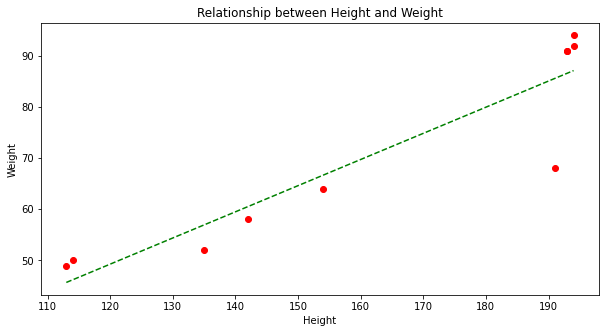

In [20]:
plt.figure(figsize = (10, 5))
plt.title("Relationship between Height and Weight")
plt.scatter(df['Height'], df['Weight'], color = 'r')
plt.plot(df['Height'], df['Predicted Weight'], 'g--')
plt.xlabel('Height')
plt.ylabel('Weight');

# Error Metrics

In [24]:
# Calculating Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y, y_hat)
rmse = round(np.sqrt(mse), 2)
print(rmse)
print(y_hat.mean())

6.94
70.9


In [27]:
y_hat.min(), y_hat.max() 

(45.68716205489302, 87.11190594036292)

In [31]:
# Calculate MAPE
def mape(x, y):
    return round(abs((x - y) / x).mean()*100, 2)

In [36]:
print("Mean Absolute Percent Error is", mape(y, y_hat))

Mean Absolute Percent Error is 8.05
